# YT Analysis 

In [116]:
# Import the libraries you'll need here.
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns
# This command tells python to use seaborn for its styling.
sns.set()

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

# Provides z-score helper function
import scipy.stats as stats

import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from textblob import TextBlob

from wordcloud import WordCloud

import re, string

import demoji
from langdetect import detect

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Justin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Justin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Justin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Justin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
df = pd.read_csv('data/US_english_comments.csv')
df.head()

,video_id,comment_text,likes,replies,comments_cleaned,lang
0,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,I've been following you from the start of your...,en
1,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,Say hi to Kong and maverick for me,en
2,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,#1 on trending AYYEEEEE,en
3,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,The end though,en
4,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,Happy one year vlogaversary,en


## Cleaning Pt2.

In [17]:
regex = r"[^0-9A-Za-z'\t]"
copy = df.copy()

copy['reg'] = copy['comments_cleaned'].apply(lambda x : re.findall(regex,x))
copy['regular_comments'] = copy['comments_cleaned'].apply(lambda x : re.sub(regex," ",x))

In [18]:
dataset = copy[['video_id','regular_comments','likes','replies']]
dataset.head()

,video_id,regular_comments,likes,replies
0,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
1,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
2,XpVt6Z1Gjjo,1 on trending AYYEEEEE,3,0
3,XpVt6Z1Gjjo,The end though,4,0
4,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0


In [19]:
dataset = dataset.rename(columns = {"regular_comments":"comments"})
dataset.head()

,video_id,comments,likes,replies
0,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
1,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
2,XpVt6Z1Gjjo,1 on trending AYYEEEEE,3,0
3,XpVt6Z1Gjjo,The end though,4,0
4,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0


In [20]:
dataset.to_csv("data/UScomments_clean.csv",index = False)

## Data Pre-processing

In [61]:
df = pd.read_csv('data/UScomments_clean.csv')

In [62]:
df['polarity'] = df['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [63]:
print(df.shape)
df.head()

(384078, 5)


,video_id,comments,likes,replies,polarity
0,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
1,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
2,XpVt6Z1Gjjo,1 on trending AYYEEEEE,3,0,0.0
3,XpVt6Z1Gjjo,The end though,4,0,0.0
4,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.8


In [66]:
df['pol_cat'] = np.nan

df['pol_cat'][df.polarity > 0] = 1
df['pol_cat'][df.polarity <= 0] = -1


<ipython-input-66-eab65017a71b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pol_cat'][df.polarity > 0] = 1
<ipython-input-66-eab65017a71b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pol_cat'][df.polarity <= 0] = -1


In [76]:
df.head()

,video_id,comments,likes,replies,polarity,pol_cat
0,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0,-1.0
1,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0,-1.0
2,XpVt6Z1Gjjo,1 on trending AYYEEEEE,3,0,0.0,-1.0
3,XpVt6Z1Gjjo,The end though,4,0,0.0,-1.0
4,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.8,1.0


-1.0    202516
 1.0    181562
Name: pol_cat, dtype: int64

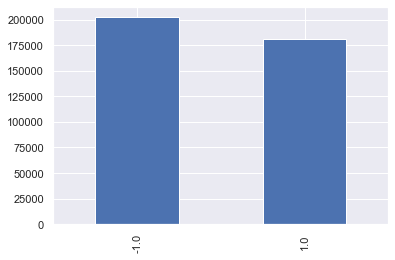

In [77]:
df['pol_cat'].value_counts().plot.bar()
df['pol_cat'].value_counts()

In [79]:
#convert to all lower
df['comments'] = df['comments'].str.lower()

In [80]:
df['comments'].head()

0    i've been following you from the start of your...
1                   say hi to kong and maverick for me
2                               1 on trending ayyeeeee
3                                      the end though 
4                          happy one year vlogaversary
Name: comments, dtype: object

In [82]:
#strip trailing spaces
df['comments'] = df['comments'].str.strip()

In [86]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sen = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sen)

df['stop_comments'] = df['comments'].apply(lambda x:remove_stopwords(x))

In [87]:
df.head()

,video_id,comments,likes,replies,polarity,pol_cat,stop_comments
0,XpVt6Z1Gjjo,i've been following you from the start of your...,3,0,0.0,-1.0,'ve following start vine channel seen 365 vlogs
1,XpVt6Z1Gjjo,say hi to kong and maverick for me,3,0,0.0,-1.0,say hi kong maverick
2,XpVt6Z1Gjjo,1 on trending ayyeeeee,3,0,0.0,-1.0,1 trending ayyeeeee
3,XpVt6Z1Gjjo,the end though,4,0,0.0,-1.0,end though
4,XpVt6Z1Gjjo,happy one year vlogaversary,3,0,0.8,1.0,happy one year vlogaversary


## Data Splitting

In [91]:
X_train,X_test,y_train,y_test = train_test_split(df['stop_comments'],df['pol_cat'],test_size=0.2,random_state=60)

In [96]:
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

tf_train.shape

(307262, 99946)

In [101]:
LogReg = LogisticRegression()
LogReg.fit(tf_train,y_train)

C:\Users\Justin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
LogReg.score(tf_train,y_train)

0.9678385221732593

In [103]:
LogReg.score(tf_test,y_test)

0.9550484274109561

In [110]:
expected = y_test
predicted = LogReg.predict(tf_test)

cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)


[[33858  2255]
 [ 1198 39505]]


In [117]:
print(metrics.classification_report(expected,predicted) , "\t")
print(f1_score(expected,predicted,average='macro'))

              precision    recall  f1-score   support

        -1.0       0.95      0.97      0.96     40703
         1.0       0.97      0.94      0.95     36113

    accuracy                           0.96     76816
   macro avg       0.96      0.95      0.95     76816
weighted avg       0.96      0.96      0.96     76816
 	
0.9548041797174465


# Visaulization

In [123]:
df1 = df.copy()
df2 = pd.read_csv('data/USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [208]:
df2.drop_duplicates()
df2.dropna()
df_merge = pd.merge(df2,df1,on='video_id')
df_merge.head()

,video_id,title,channel_title,category_id,tags,views,likes_x,dislikes,comment_total,thumbnail_link,date,comments,likes_y,replies,polarity,pol_cat,stop_comments
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,i've been following you from the start of your...,3,0,0.0,-1.0,'ve following start vine channel seen 365 vlogs
1,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,say hi to kong and maverick for me,3,0,0.0,-1.0,say hi kong maverick
2,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,1 on trending ayyeeeee,3,0,0.0,-1.0,1 trending ayyeeeee
3,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,the end though,4,0,0.0,-1.0,end though
4,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,happy one year vlogaversary,3,0,0.8,1.0,happy one year vlogaversary


In [209]:
df_merge.groupby('video_id').describe()

category_id                                            views  \
                  count  mean  std   min   25%   50%   75%   max   count   
video_id                                                                   
--JinobXWPk        86.0  15.0  0.0  15.0  15.0  15.0  15.0  15.0    86.0   
-1fzGnFwz9M        79.0  15.0  0.0  15.0  15.0  15.0  15.0  15.0    79.0   
-3AGlBYyLjo         4.0  24.0  0.0  24.0  24.0  24.0  24.0  24.0     4.0   
-5sCWsLlTCI        51.0  24.0  0.0  24.0  24.0  24.0  24.0  24.0    51.0   
-6Zc8Co2H3w      1324.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0  1324.0   
...                 ...   ...  ...   ...   ...   ...   ...   ...     ...   
zqE-ultsWt0      2070.0  28.0  0.0  28.0  28.0  28.0  28.0  28.0  2070.0   
zrOHeEA14kQ      1075.0  25.0  0.0  25.0  25.0  25.0  25.0  25.0  1075.0   
zuKX0fPlo2Q         4.0  22.0  0.0  22.0  22.0  22.0  22.0  22.0     4.0   
zuUQDdWNAPc       168.0  24.0  0.0  24.0  24.0  24.0  24.0  24.0   168.0   
zyPIdeF4NFI       784.0  22.0  0.0  22.0  22.0  22.0  22.0  22.0   784.0   

                         ...  polarity           pol_cat                      \
                   mean  ...       75%       max   count      mean       std   
video_id                 ...                                                   
--JinobXWPk  1319945.00  ...  0.136127  1.000000    86.0 -0.302326  0.958795   
-1fzGnFwz9M   189414.00  ...  0.300375  0.633333    79.0  0.240506  0.976850   
-3AGlBYyLjo     2143.00  ... -0.093750  0.000000     4.0 -1.000000  0.000000   
-5sCWsLlTCI    85052.00  ...  0.362500  0.800000    51.0  0.019608  1.009756   
-6Zc8Co2H3w  1784838.50  ...  0.500000  1.000000  1324.0  0.075529  0.997520   
...                 ...  ...       ...       ...     ...       ...       ...   
zqE-ultsWt0  2268069.60  ...  0.200000  1.000000  2070.0 -0.106280  0.994576   
zrOHeEA14kQ   461291.40  ...  0.136364  0.800000  1075.0 -0.255814  0.967176   
zuKX0fPlo2Q     2093.00  ...  0.550000  0.550000     4.0  1.000000  0.000000   
zuUQDdWNAPc   304658.00  ...  0.350000  1.000000   168.0  0.047619  1.001852   
zyPIdeF4NFI    39172.25  ...  0.500000  1.000000   784.0  0.204082  0.979579   

                                      
             min  25%  50%  75%  max  
video_id                              
--JinobXWPk -1.0 -1.0 -1.0  1.0  1.0  
-1fzGnFwz9M -1.0 -1.0  1.0  1.0  1.0  
-3AGlBYyLjo -1.0 -1.0 -1.0 -1.0 -1.0  
-5sCWsLlTCI -1.0 -1.0  1.0  1.0  1.0  
-6Zc8Co2H3w -1.0 -1.0  1.0  1.0  1.0  
...          ...  ...  ...  ...  ...  
zqE-ultsWt0 -1.0 -1.0 -1.0  1.0  1.0  
zrOHeEA14kQ -1.0 -1.0 -1.0  1.0  1.0  
zuKX0fPlo2Q  1.0  1.0  1.0  1.0  1.0  
zuUQDdWNAPc -1.0 -1.0  1.0  1.0  1.0  
zyPIdeF4NFI -1.0 -1.0  1.0  1.0  1.0  

[2259 rows x 80 columns]

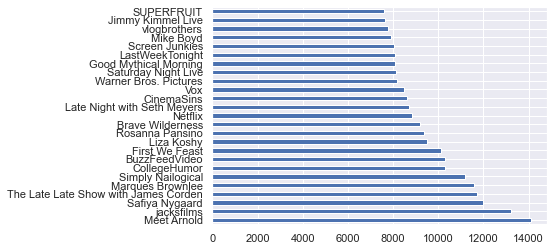

In [210]:
df_merge['channel_title'].value_counts().head(25).plot.barh()

In [211]:
df2[['title','views']].nlargest(10,'views')

,title,views
1907,BTS (방탄소년단) 'DNA' Official MV,41500672
1694,BTS (방탄소년단) 'DNA' Official MV,38013692
177,ZAYN - Dusk Till Dawn ft. Sia,36323498
7135,Eminem Rips Donald Trump In BET Hip Hop Awards...,33191594
6917,Eminem Rips Donald Trump In BET Hip Hop Awards...,32512343
1995,Shakira - Perro Fiel (Official Video) ft. Nick...,32136948
6672,Eminem Rips Donald Trump In BET Hip Hop Awards...,31636010
1440,BTS (방탄소년단) 'DNA' Official MV,30424471
6431,Eminem Rips Donald Trump In BET Hip Hop Awards...,30224787
6204,Eminem Rips Donald Trump In BET Hip Hop Awards...,28212358


In [175]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

stopwords = set(STOPWORDS)
comment_words = '' 

for val in df_merge['stop_comments']:  
    split the value 
    qtokens = val.split() 
    
    comment_words += " ".join(tokens)+" "

    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


ValueError: We need at least 1 word to plot a word cloud, got 0.